In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum07/data/apples_and_oranges.csv', sep = ',')

df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay,
    ConfusionMatrixDisplay
)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weight        40 non-null     int64  
 1   Size          40 non-null     float64
 2   Class         40 non-null     object 
 3   jk_bin        40 non-null     Int64  
 4   ClassEncoded  40 non-null     int64  
dtypes: Int64(1), float64(1), int64(2), object(1)
memory usage: 1.7+ KB


In [5]:
df.isnull().sum()

,0
Weight,0
Size,0
Class,0


In [6]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [8]:
df = df.drop_duplicates()

In [9]:
df['Class'].unique()

array(['orange', 'apple'], dtype=object)

In [10]:
df['Weight'].unique()

array([69, 65, 72, 67, 73, 70, 75, 74, 68, 66, 71])

In [11]:
df['Size'].unique()

array([4.39, 4.21, 4.09, 5.85, 4.7 , 5.68, 5.56, 5.11, 5.36, 4.27, 5.79,
       5.47, 5.53, 4.47, 5.22, 4.48, 4.66, 5.25, 4.18, 5.5 , 4.13, 4.83,
       4.61, 4.08, 4.25, 5.35, 4.01, 4.22, 5.26, 5.78, 4.68, 5.72, 5.17,
       4.11, 4.76, 5.48, 5.59, 5.03])

In [32]:
## buat mapping kolom dataset -> biner

df['ClassEncoded'] = df['Class'].map({'apple':1, 'orange':0})

X = df[['Weight', 'Size']]
y = df['ClassEncoded']


print("apples_oranges_bin:\n", df['Class'].value_counts())


apples_oranges_bin:
 Class
orange    20
apple     20
Name: count, dtype: int64


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Jumlah data training: {len(X_train)} | data testing: {len(X_test)}")

Jumlah data training: 32 | data testing: 8


In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [36]:
print("\nEvaluasi Model")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=['orange','apple']))



Evaluasi Model
Akurasi: 1.0
Confusion Matrix:
 [[5 0]
 [0 3]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

      orange       1.00      1.00      1.00         5
       apple       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



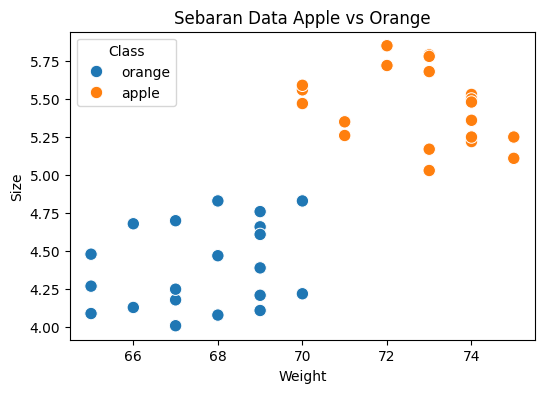

In [28]:
## buat visualisasi
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Weight", y="Size", hue="Class", s=80)
plt.title("Sebaran Data Apple vs Orange")
plt.show()